In [1]:
from tensorflow import keras
from keras import datasets, layers, losses
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd

In [2]:
!gdown --id 1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g -O CIFAR10.tar.gz
!tar xzf CIFAR10.tar.gz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g
To: /content/CIFAR10.tar.gz
100% 19.8M/19.8M [00:01<00:00, 19.6MB/s]


In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 4s 0us/step


In [4]:
model = keras.Sequential([
                          
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10, kernel_initializer='he_uniform', activation='softmax')

])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [6]:
model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [7]:
history = model.fit(train_images, train_labels, batch_size=50, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25
1000/1000 [==============================] - 354s 352ms/step - loss: 1.6641 - accuracy: 0.3856 - val_loss: 1.2256 - val_accuracy: 0.5615
Epoch 2/25
1000/1000 [==============================] - 349s 349ms/step - loss: 1.1791 - accuracy: 0.5793 - val_loss: 0.9650 - val_accuracy: 0.6550
Epoch 3/25
1000/1000 [==============================] - 348s 348ms/step - loss: 0.9621 - accuracy: 0.6644 - val_loss: 0.8248 - val_accuracy: 0.7130
Epoch 4/25
1000/1000 [==============================] - 351s 351ms/step - loss: 0.8513 - accuracy: 0.7029 - val_loss: 0.7512 - val_accuracy: 0.7415
Epoch 5/25
1000/1000 [==============================] - 357s 357ms/step - loss: 0.7815 - accuracy: 0.7271 - val_loss: 0.7150 - val_accuracy: 0.7506
Epoch 6/25
1000/1000 [==============================] - 354s 354ms/step - loss: 0.7232 - accuracy: 0.7505 - val_loss: 0.7454 - val_accuracy: 0.7443
Epoch 7/25
1000/1000 [==============================] - 353s 353ms/step - loss: 0.6840 - accuracy: 0.7633 - val_

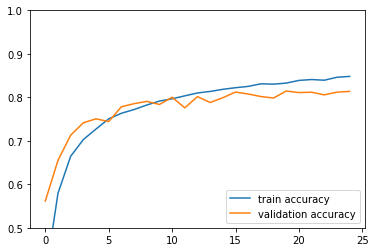

In [8]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

در ابتدا که فقط شرایط سوال 1 را انجام دهیم مشاهده میشود که مدل انقدر خوب عمل نمیکند و بیش برازش اتفاق افتاده و در سوال دوم میبینیم که مدل کمی از لحاظ دقت و سرعت بهتر شده و در سوال سوم در آخر که نمودار نهایی اش در اینجا قرار داده شده میبینیم که بیش برازش نداریم و مدل خیلی بهتر شده است.